
# Линейная регрессия


In [148]:
from sklearn import preprocessing # для нормализации
from sklearn.linear_model import LinearRegression # Класс для осуществления регрессии
from sklearn.model_selection import train_test_split # Разделение данных на тестовые и тренировочные

import numpy as np # Работа с данными
import pandas as pd
import matplotlib.pyplot as plt # Строим графики

import seaborn as sns # Для визуализации данных
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.linear_model import RANSACRegressor


*Загружаем датасет*

In [149]:
dataset = pd.read_csv("./Indexes_by_year.csv", delimiter = ",")

**Анализируем датафрейм**

In [150]:
dataset

,Rank,Country,Quality of Life Index,Purchasing Power Index,Safety Index,Health Care Index,Cost of Living Index,Property Price to Income Ratio,Traffic Commute Time Index,Pollution Index,Climate Index,Year
0,1,Switzerland,190.82,110.96,78.65,74.47,131.75,8.42,28.73,20.09,80.05,2021
1,2,Denmark,190.01,94.73,73.28,79.96,91.67,6.66,28.69,20.40,81.8,2021
2,3,Netherlands,183.31,83.89,72.78,75.76,78.64,7.35,27.81,25.28,87.11,2021
3,4,Finland,182.79,89.05,72.99,76.40,77.46,8.64,28.96,11.86,56.64,2021
4,5,Austria,182.37,78.23,74.77,78.40,75.49,10.40,25.68,19.20,77.79,2021
...,...,...,...,...,...,...,...,...,...,...,...,...
684,47,Russia,-7.39,44.05,49.43,35.52,69.37,14.41,47.83,104.67,-,2012
685,48,Ukraine,-14.61,27.22,44.61,40.28,51.68,16.68,33.00,100.24,-,2012
686,49,Egypt,-22.17,27.17,55.69,65.74,50.77,11.81,59.00,125.71,-,2012
687,50,Iran,-35.23,46.38,48.14,43.40,54.32,12.48,73.50,131.85,-,2012


In [151]:
print(dataset.dtypes) # Отбираем только числовые показатели, не имеющие null
print(pd.isnull(dataset).any())

Rank                                int64
Country                            object
Quality of Life Index             float64
Purchasing Power Index            float64
Safety Index                      float64
Health Care Index                 float64
Cost of Living Index              float64
Property Price to Income Ratio    float64
Traffic Commute Time Index        float64
Pollution Index                   float64
Climate Index                      object
Year                                int64
dtype: object
Rank                              False
Country                           False
Quality of Life Index             False
Purchasing Power Index            False
Safety Index                      False
Health Care Index                 False
Cost of Living Index              False
Property Price to Income Ratio    False
Traffic Commute Time Index        False
Pollution Index                   False
Climate Index                     False
Year                              False
dt

In [152]:
# Удаляем лишние столбцы и разделяем данные на целевые и характеристики.
# intFilter = np.array(dataset[[
#                              "Rank",
#                              "Purchasing Power Index",
#                              "Safety Index",
#                              "Health Care Index",
#                              "Cost of Living Index",
#                              "Property Price to Income Ratio",
#                              "Traffic Commute Time Index",
#                              "Pollution Index"]
#                              ])

data = dataset.drop(["Quality of Life Index", "Country", "Climate Index", "Year"], axis=1) # Удаляем ненужные столбцы из датасета

# Представим наши массивы в numpy
X = data # data
Y = dataset["Quality of Life Index"] # target

data


,Rank,Purchasing Power Index,Safety Index,Health Care Index,Cost of Living Index,Property Price to Income Ratio,Traffic Commute Time Index,Pollution Index
0,1,110.96,78.65,74.47,131.75,8.42,28.73,20.09
1,2,94.73,73.28,79.96,91.67,6.66,28.69,20.40
2,3,83.89,72.78,75.76,78.64,7.35,27.81,25.28
3,4,89.05,72.99,76.40,77.46,8.64,28.96,11.86
4,5,78.23,74.77,78.40,75.49,10.40,25.68,19.20
...,...,...,...,...,...,...,...,...
684,47,44.05,49.43,35.52,69.37,14.41,47.83,104.67
685,48,27.22,44.61,40.28,51.68,16.68,33.00,100.24
686,49,27.17,55.69,65.74,50.77,11.81,59.00,125.71
687,50,46.38,48.14,43.40,54.32,12.48,73.50,131.85


*Визуализируем данные*

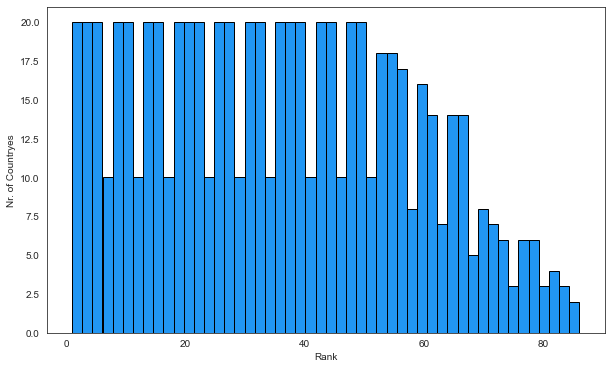

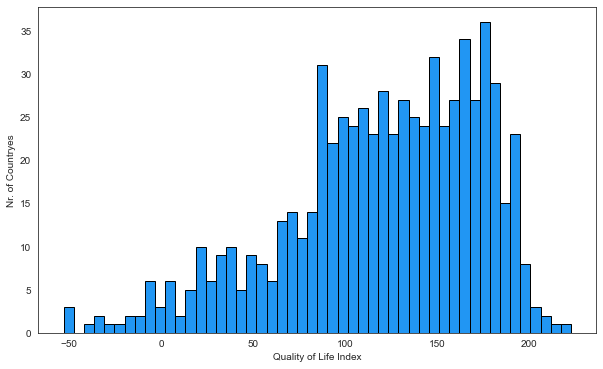

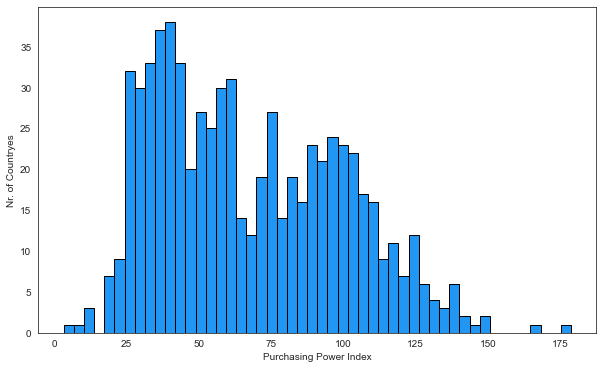

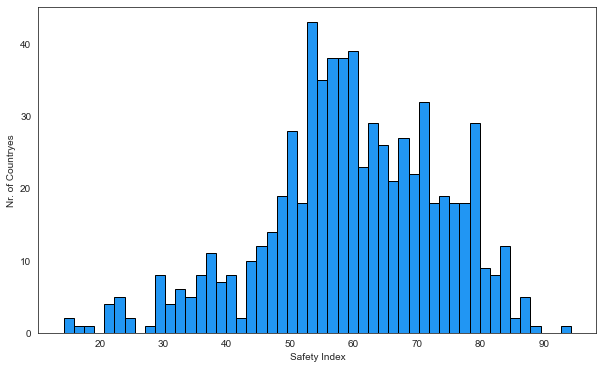

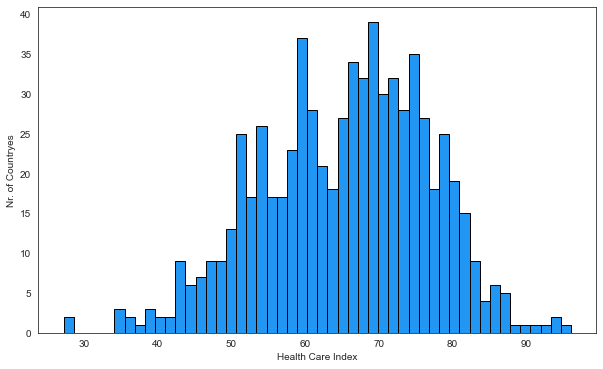

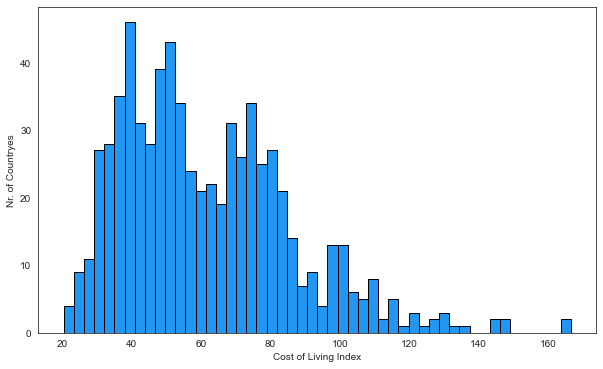

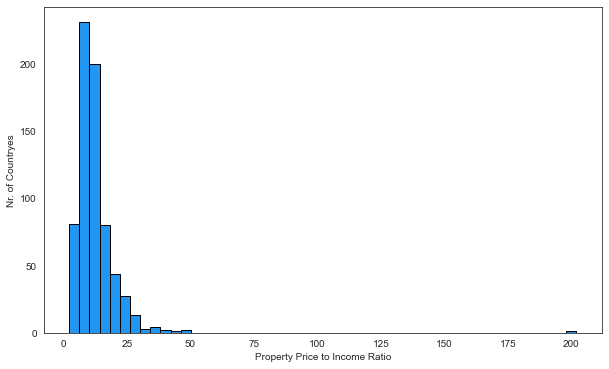

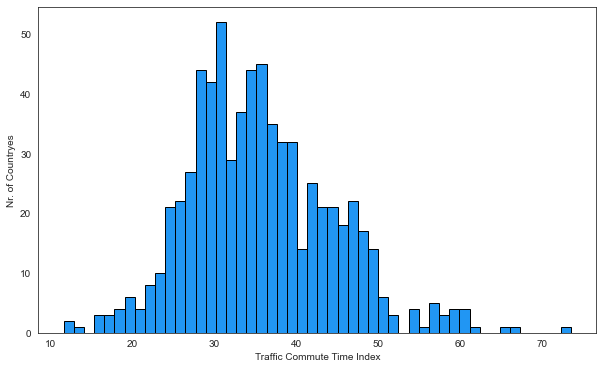

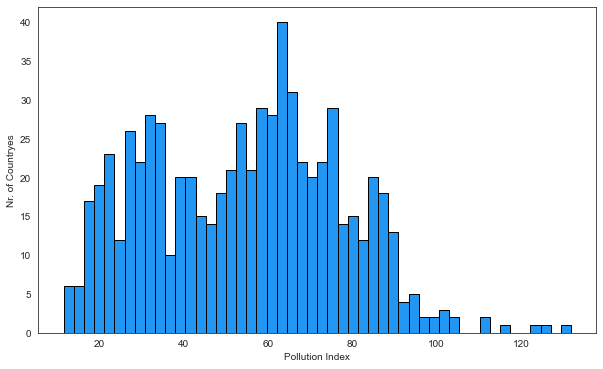

In [153]:
# Просмотрим кол-во странн по индексу
def viewTarget(trg, x_label, y_label):
    plt.figure(figsize=(10, 6))
    plt.hist(trg, bins = 50, ec='black', color = '#2196f3')
    plt.xlabel(x_label)
    plt.ylabel(y_label)

    plt.show()

# Проанализируем графики параметров.
data_on_view = dataset.drop(["Country", "Climate Index", "Year" ], axis= 1)
for x in data_on_view.columns:
    viewTarget(data_on_view[x], x, 'Nr. of Countryes')

***Трансформируем рейтинги***

In [154]:
data_on_view["Rank"].skew()

0.20981360042525019

In [155]:
data_on_view["Rank"].min

<bound method NDFrame._add_numeric_operations.<locals>.min of 0       1
1       2
2       3
3       4
4       5
       ..
684    47
685    48
686    49
687    50
688    51
Name: Rank, Length: 689, dtype: int64>

In [156]:
rank_log = np.log(data_on_view['Rank'])
rank_log.tail

<bound method NDFrame.tail of 0      0.000000
1      0.693147
2      1.098612
3      1.386294
4      1.609438
         ...   
684    3.850148
685    3.871201
686    3.891820
687    3.912023
688    3.931826
Name: Rank, Length: 689, dtype: float64>

In [157]:
rank_log.skew() # Искажение

-1.3910208021291979

C:\Users\kuzin\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


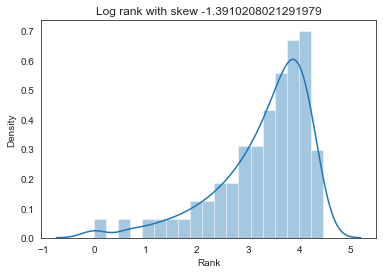

In [158]:
sns.distplot(rank_log)
plt.title(f'Log rank with skew {rank_log.skew()}')
plt.show()

In [159]:
# Поменяем рейтинги на логаримы
X["Rank"] = rank_log
print(X["Rank"])
print(rank_log)

0      0.000000
1      0.693147
2      1.098612
3      1.386294
4      1.609438
         ...   
684    3.850148
685    3.871201
686    3.891820
687    3.912023
688    3.931826
Name: Rank, Length: 689, dtype: float64
0      0.000000
1      0.693147
2      1.098612
3      1.386294
4      1.609438
         ...   
684    3.850148
685    3.871201
686    3.891820
687    3.912023
688    3.931826
Name: Rank, Length: 689, dtype: float64


**Нормализуем нашу банду**

In [160]:
min_max_scaler = preprocessing.MinMaxScaler() # Создаем объект для нормализации
# Нормализуем по мин-макс
X = min_max_scaler.fit_transform(X)
# Y = min_max_scaler.fit_transform(Y.values.reshape(-1, 1))
Y = min_max_scaler.fit_transform(Y.values.reshape(-1, 1))
# Y = Y.values

*Multivaribale Regression*

***Пробуем обучить***

*Training & Test Dataset Split*

In [161]:

X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size = 0.7, random_state = 42)

In [162]:
my_regr = LinearRegression()

my_regr.fit(X_train, y_train)

print("Training data r-squared:", my_regr.score(X_train, y_train))
print("Test data r-squared:", my_regr.score(X_test, y_test))

print("Intercept", my_regr.intercept_)
# index_data = data_on_view.drop('Quality of Life Index', axis = 1).columns

pd.DataFrame(data = my_regr.coef_[0], index = data.columns, columns=['coef'])


Training data r-squared: 0.8407054815890146
Test data r-squared: 0.7821072052255317
Intercept [0.6812686]


,coef
Rank,-0.083003
Purchasing Power Index,0.486298
Safety Index,0.146745
Health Care Index,0.108944
Cost of Living Index,-0.318886
Property Price to Income Ratio,-0.540436
Traffic Commute Time Index,-0.066511
Pollution Index,-0.489252


**Кореляции**

In [163]:
# Пробуем пандовскую корреляцию
# data_corr = dataset.drop(["Country", "Climate Index", "Year"], axis= 1)
data.corr()

,Rank,Purchasing Power Index,Safety Index,Health Care Index,Cost of Living Index,Property Price to Income Ratio,Traffic Commute Time Index,Pollution Index
Rank,1.000000,-0.770335,-0.429618,-0.482771,-0.652671,0.360374,0.440686,0.717205
Purchasing Power Index,-0.770335,1.000000,0.374062,0.468873,0.622491,-0.392783,-0.307387,-0.552010
Safety Index,-0.429618,0.374062,1.000000,0.356506,0.287818,-0.085765,-0.353736,-0.381642
Health Care Index,-0.482771,0.468873,0.356506,1.000000,0.423169,-0.150185,-0.113404,-0.419307
Cost of Living Index,-0.652671,0.622491,0.287818,0.423169,1.000000,-0.202771,-0.270436,-0.494146
Property Price to Income Ratio,0.360374,-0.392783,-0.085765,-0.150185,-0.202771,1.000000,0.237864,0.252518
Traffic Commute Time Index,0.440686,-0.307387,-0.353736,-0.113404,-0.270436,0.237864,1.000000,0.425217
Pollution Index,0.717205,-0.552010,-0.381642,-0.419307,-0.494146,0.252518,0.425217,1.000000


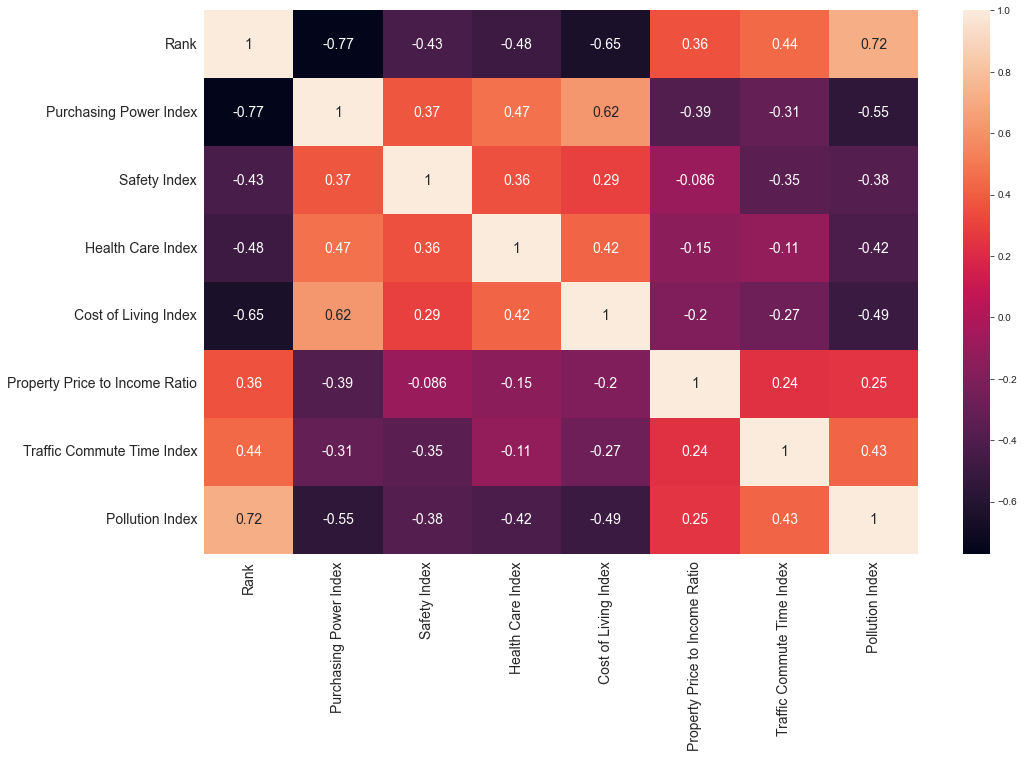

In [164]:
# Визуализируем матрицу с помощью библиотки seaborn
plt.figure(figsize = (16, 10))
sns.heatmap(data.corr(), annot=True, annot_kws={"size": 14})
sns.set_style("white")
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.show()

In [165]:
# Коррелируем данные numpy-способом(рез-ты идентичны)

dt_coef = np.around(np.corrcoef(np.array([X[:, 0], X[:, 1], X[:, 2], X[:, 3], X[:, 4], X[:, 5], X[:, 6], X[:, 7], Y[:, 0]])), decimals=4) # С нормирование Y
# dt_coef = np.around(np.corrcoef(np.array([X[:, 0], X[:, 1], X[:, 2], X[:, 3], X[:, 4], X[:, 5], X[:, 6], X[:, 7], Y])), decimals=4) # Без нормирование Y
print(dt_coef)
print(all(map(lambda x: all(map(lambda y: y > 0.11 or y < -0.11, x)), dt_coef)))

[[ 1.     -0.7703 -0.4296 -0.4828 -0.6527  0.3604  0.4407  0.7172 -0.7538]
 [-0.7703  1.      0.3741  0.4689  0.6225 -0.3928 -0.3074 -0.552   0.7502]
 [-0.4296  0.3741  1.      0.3565  0.2878 -0.0858 -0.3537 -0.3816  0.4896]
 [-0.4828  0.4689  0.3565  1.      0.4232 -0.1502 -0.1134 -0.4193  0.4969]
 [-0.6527  0.6225  0.2878  0.4232  1.     -0.2028 -0.2704 -0.4941  0.3988]
 [ 0.3604 -0.3928 -0.0858 -0.1502 -0.2028  1.      0.2379  0.2525 -0.382 ]
 [ 0.4407 -0.3074 -0.3537 -0.1134 -0.2704  0.2379  1.      0.4252 -0.438 ]
 [ 0.7172 -0.552  -0.3816 -0.4193 -0.4941  0.2525  0.4252  1.     -0.7803]
 [-0.7538  0.7502  0.4896  0.4969  0.3988 -0.382  -0.438  -0.7803  1.    ]]
False


In [166]:

# Рисуем график кареляции.
def printCoef(x, y, predict):
    ig, axs = plt.subplots(figsize=(12, 12))
    plt.title(f'Коэф. корреляции: {np.corrcoef(x, y)[0][1]}')
    axs.scatter(x , y , color='blue', alpha=0.6)
    axs.plot(x, predict, color = 'red', linewidth = 3 )
    # axs.plot(x,k_p*X+b_p, color='red')
    plt.show()

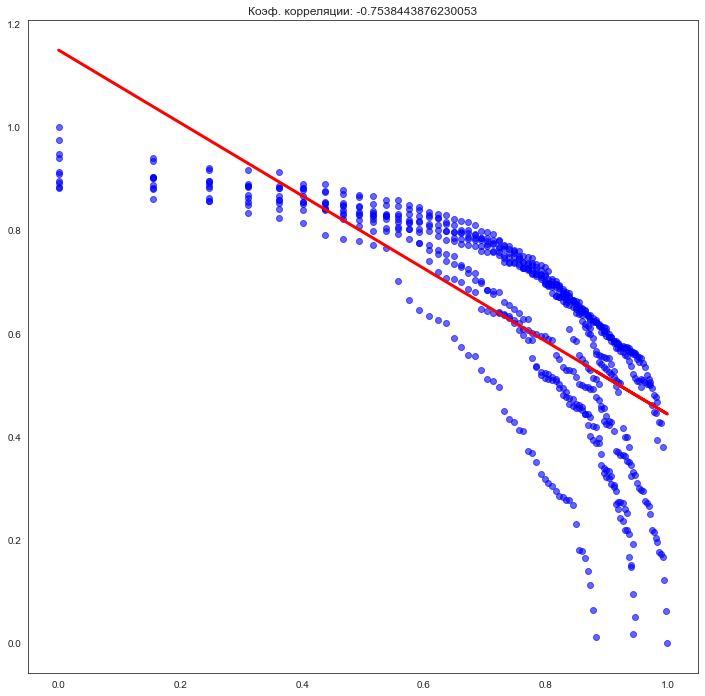

0.568281360750704


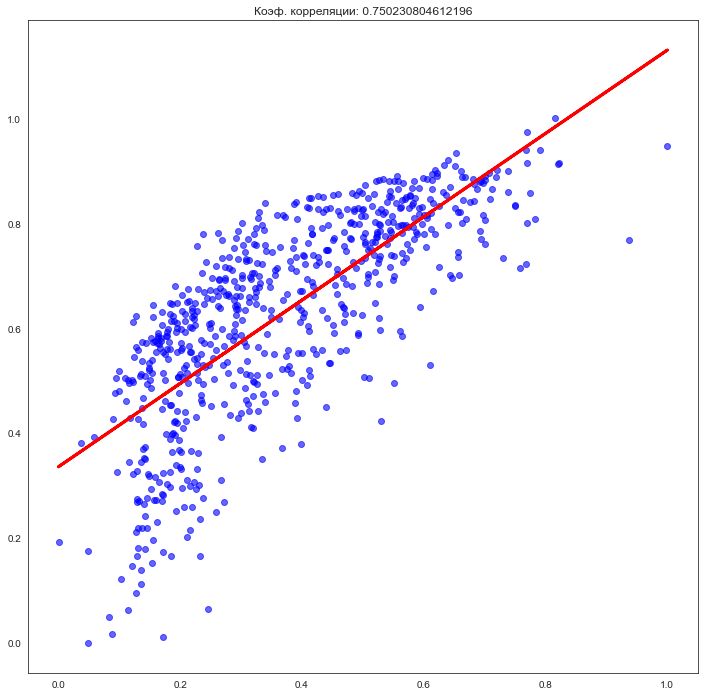

0.5628462601890631


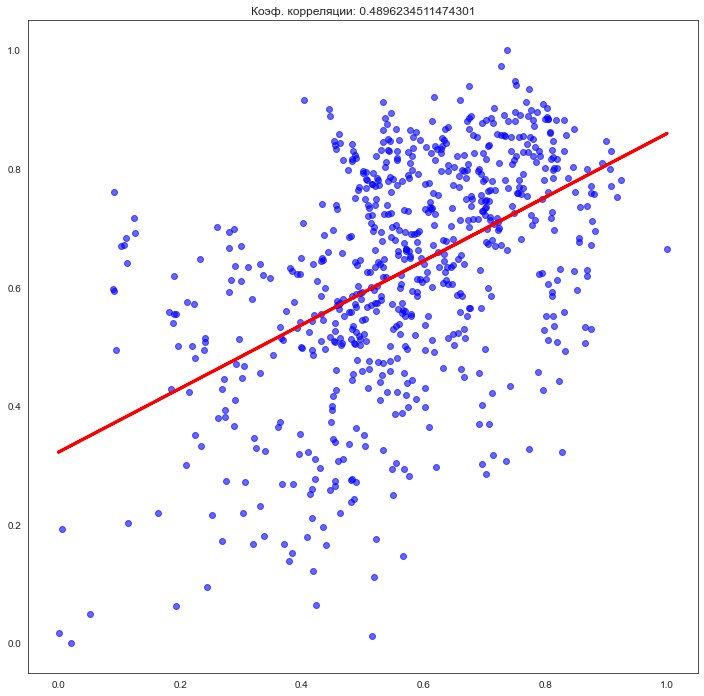

0.23973112391352003


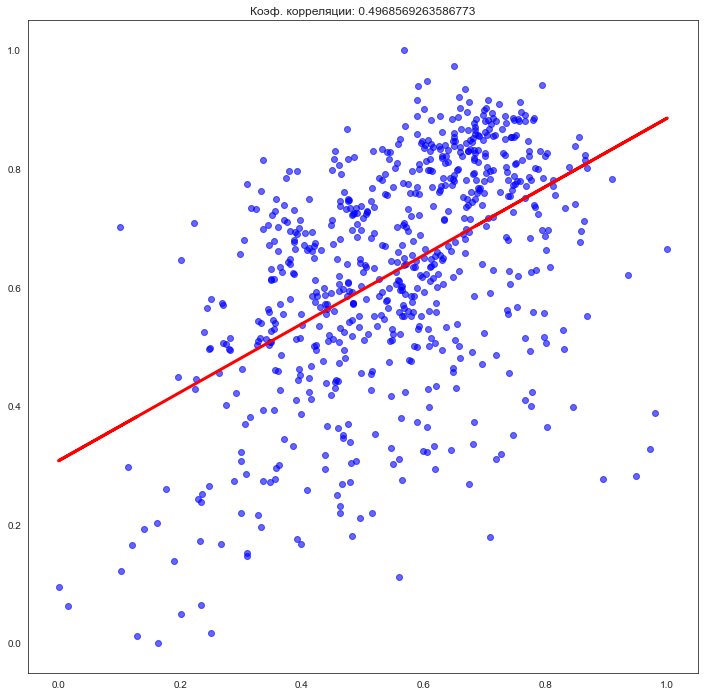

0.24686680527059202


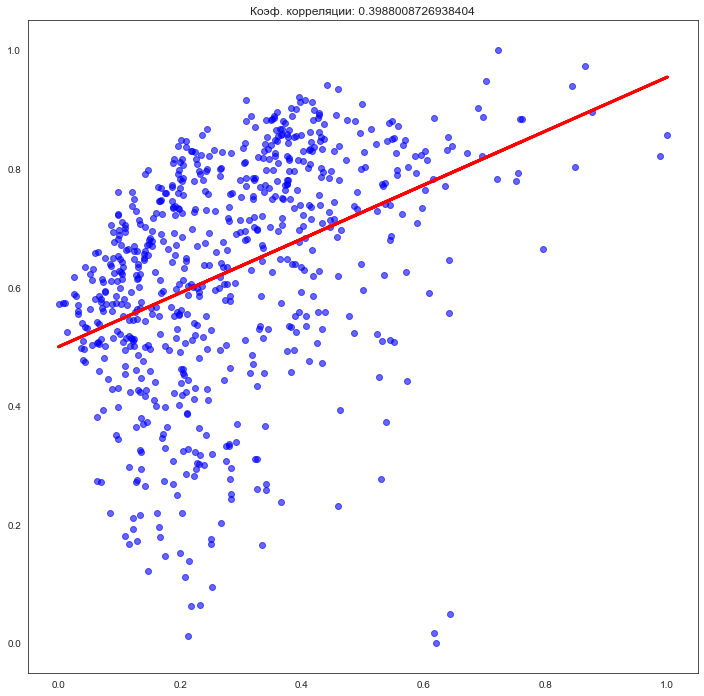

0.15904213606136886


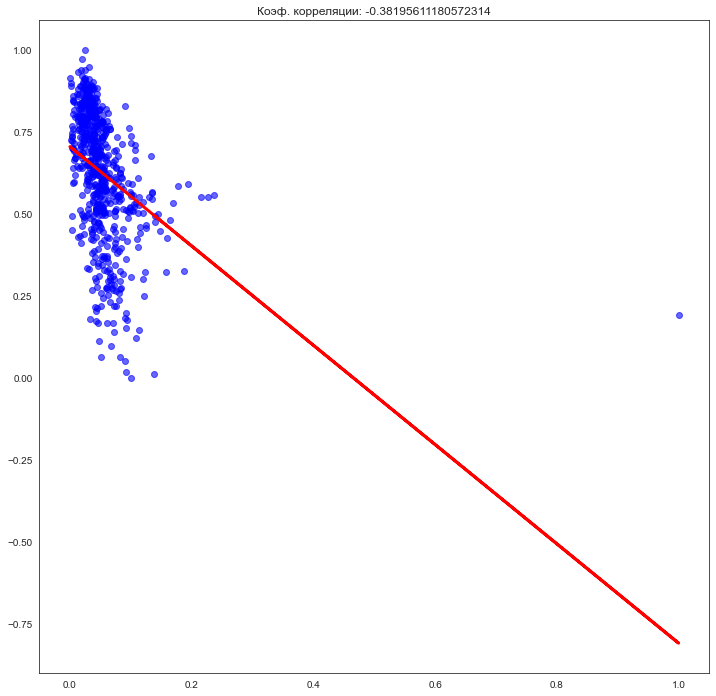

0.1458904713457463


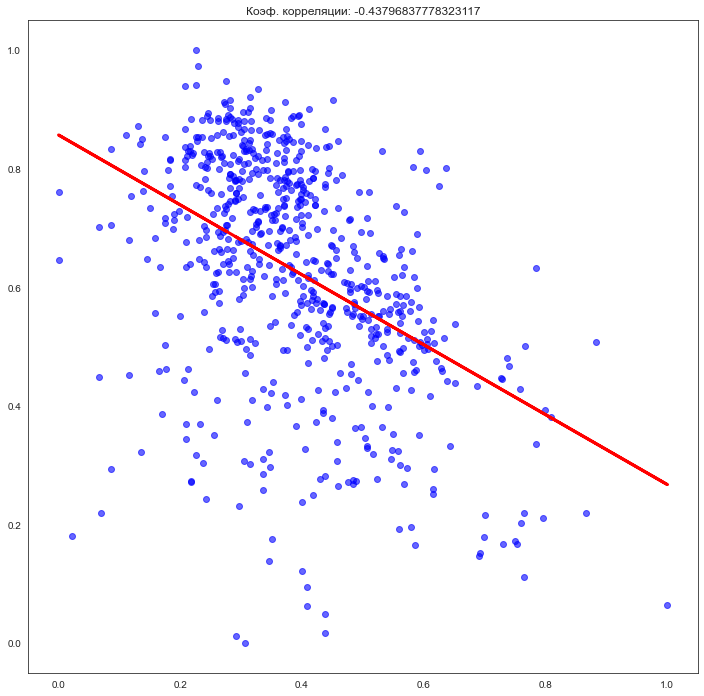

0.19181629993807503


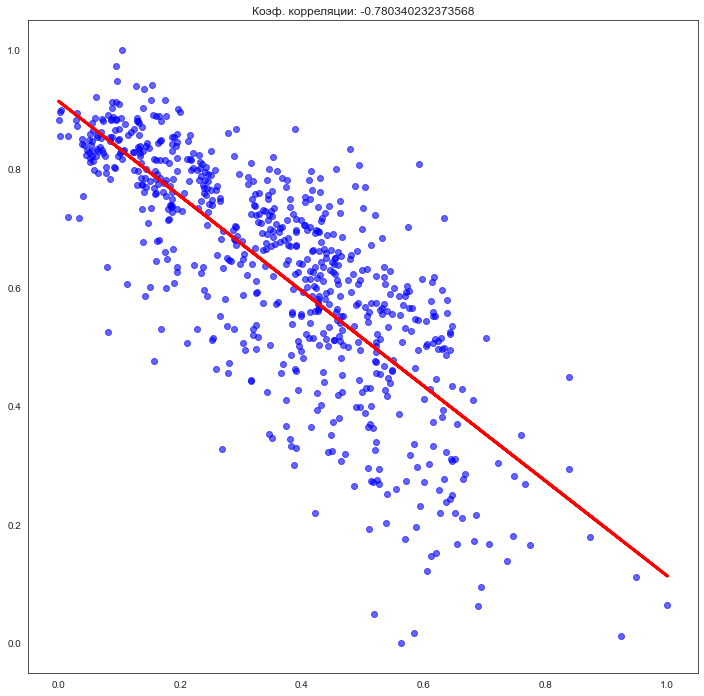

0.6089308782608337


In [167]:

# Применяем линейную регрессию для построения прямой для просмотра корреляции.
model = LinearRegression()

for i in range(X.shape[1]):
    model.fit(X[:,i].reshape(-1,1), Y)
    printCoef(X[:,i], Y[:, 0], model.predict(X[:,i].reshape(-1,1))) # С нормировкой Y
    print(model.score(X[:,i].reshape(-1,1), Y[:, 0])) # С нормировкой Y
    # printCoef(X[:,i], Y, model.predict(X[:,i].reshape(-1,1))) # Без
    # print(model.score(X[:,i].reshape(-1,1), Y)) # Без




***Пробуем RANSAC***

In [168]:
def print_RANSAC(x, y, name):

    ransac = RANSACRegressor(LinearRegression(), max_trials = 150, min_samples = 50, random_state = 0, residual_threshold = 0.3) # С нормировкой
    # ransac = RANSACRegressor(LinearRegression(), max_trials = 150, min_samples = 50, random_state = 0, residual_threshold = 100) # Без
    ransac.fit(x.reshape(-1,1), y.reshape(-1,1))

    regr = LinearRegression()
    regr.fit(x.reshape(-1,1), y.reshape(-1,1))

    print('Наклон: %.3f' % ransac.estimator_.coef_[0])
    print('Пересечение: %.3f' % ransac.estimator_.intercept_)


    plt.figure(figsize=(20, 16))
    #axs.scatter(X, y, color='black')
    plt.scatter(x[ransac.inlier_mask_], y[ransac.inlier_mask_], color='b',)
    plt.scatter(x[np.logical_not(ransac.inlier_mask_)], y[np.logical_not(ransac.inlier_mask_)], color='g',alpha=0.6)
    line_X = np.arange(0, 1, 0.01)
    line_y_ransac = ransac.predict(line_X[:, np.newaxis])
    plt.plot(line_X, line_y_ransac, color='red')
    plt.plot(x, regr.predict(x.reshape(-1, 1)), color='y')
    plt.title(name + " vs Quality of Life Index")
    plt.show()

    return ransac.inlier_mask_

In [169]:
def merge_mass(a, b):
    rezult = np.array()
    for i in range(a.size):
        if a[i]:
            rezult = rezult.append(True)
        elif b[i]:
            rezult = rezult.append(True)
        else:
            rezult = rezult.append(False)
    return rezult

Наклон: -0.671
Пересечение: 1.132


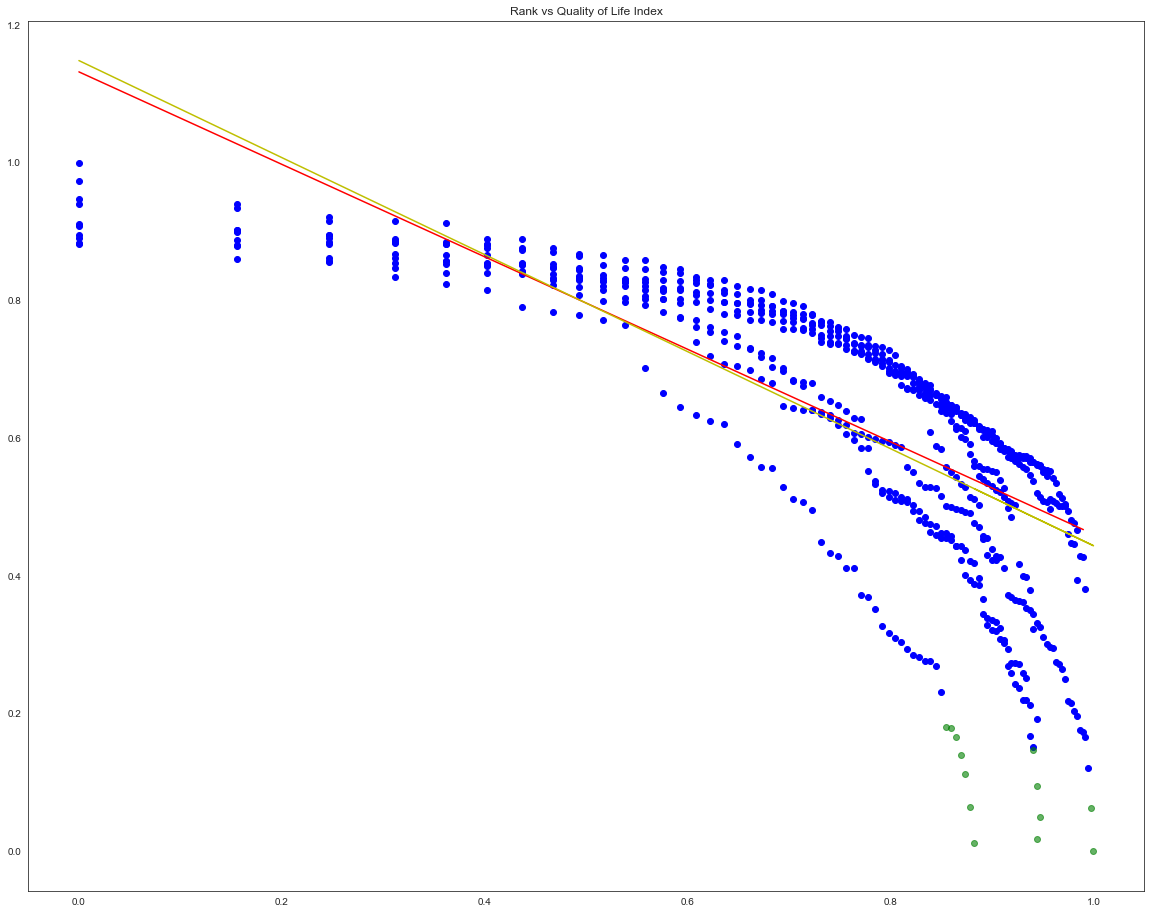

(676, 8)
Наклон: 0.738
Пересечение: 0.366


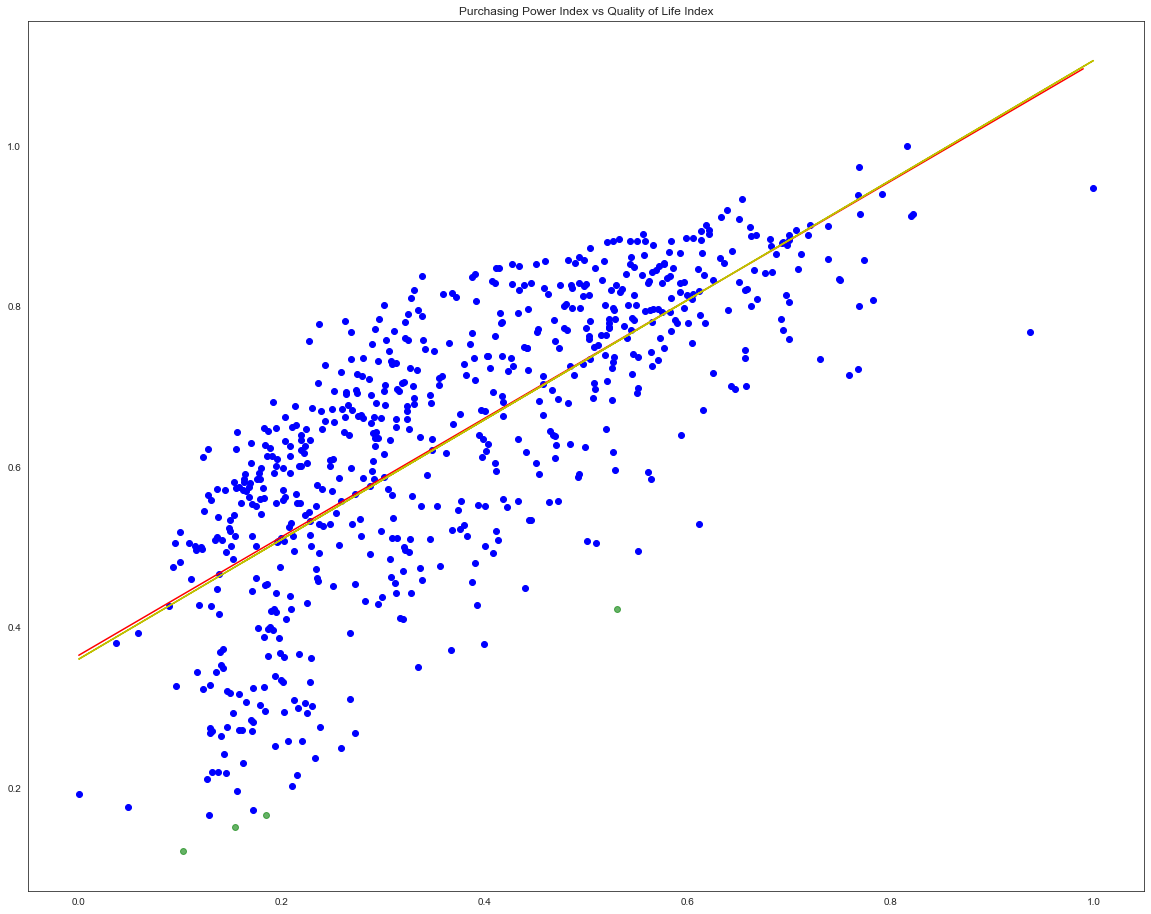

(672, 8)
Наклон: 0.492
Пересечение: 0.366


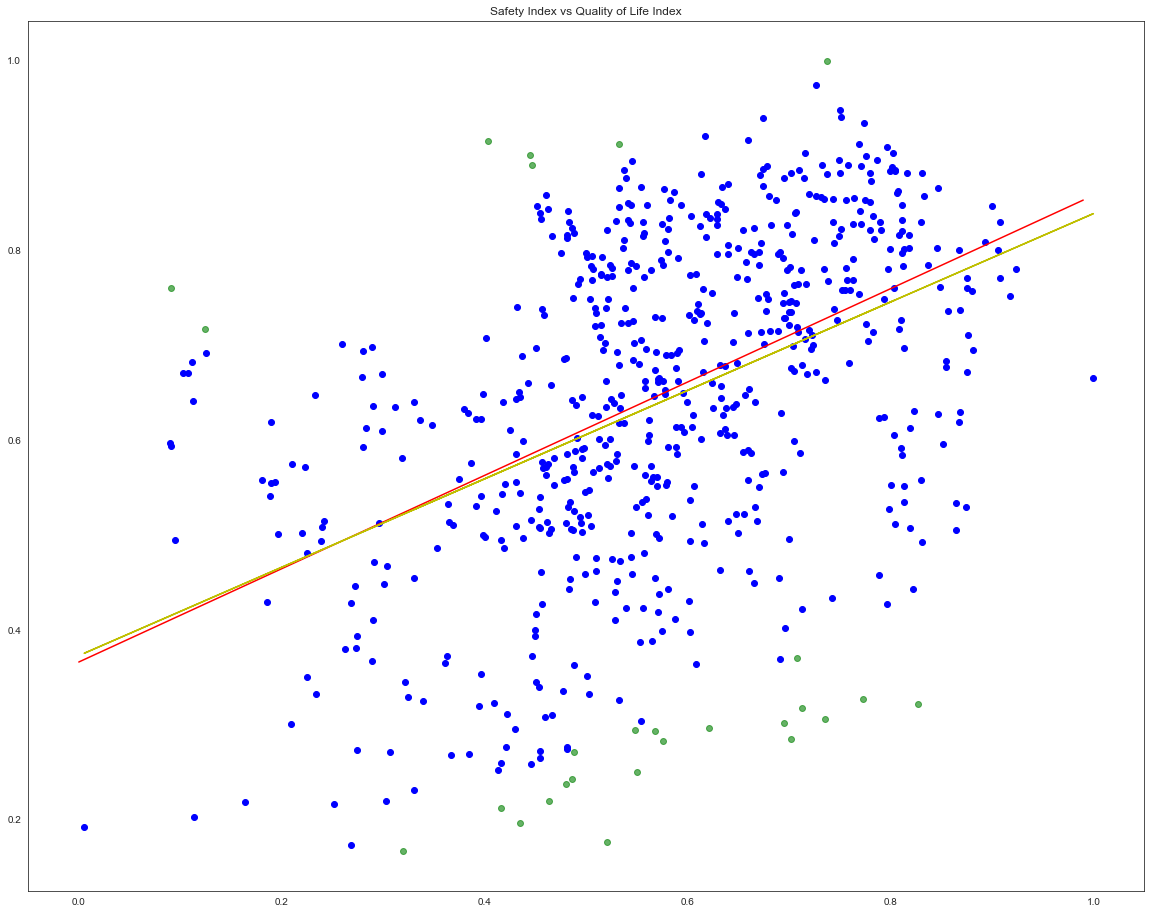

(645, 8)
Наклон: 0.512
Пересечение: 0.369


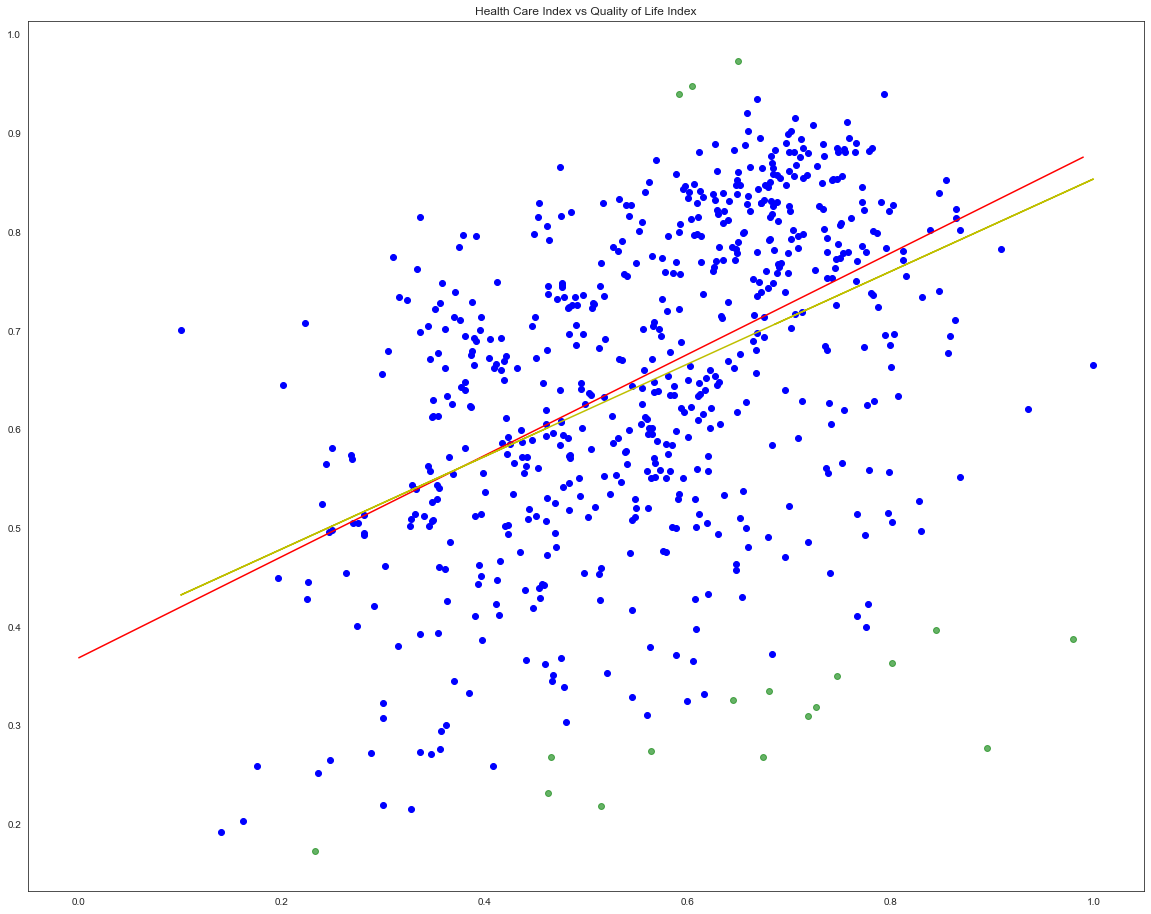

(627, 8)
Наклон: 0.430
Пересечение: 0.547


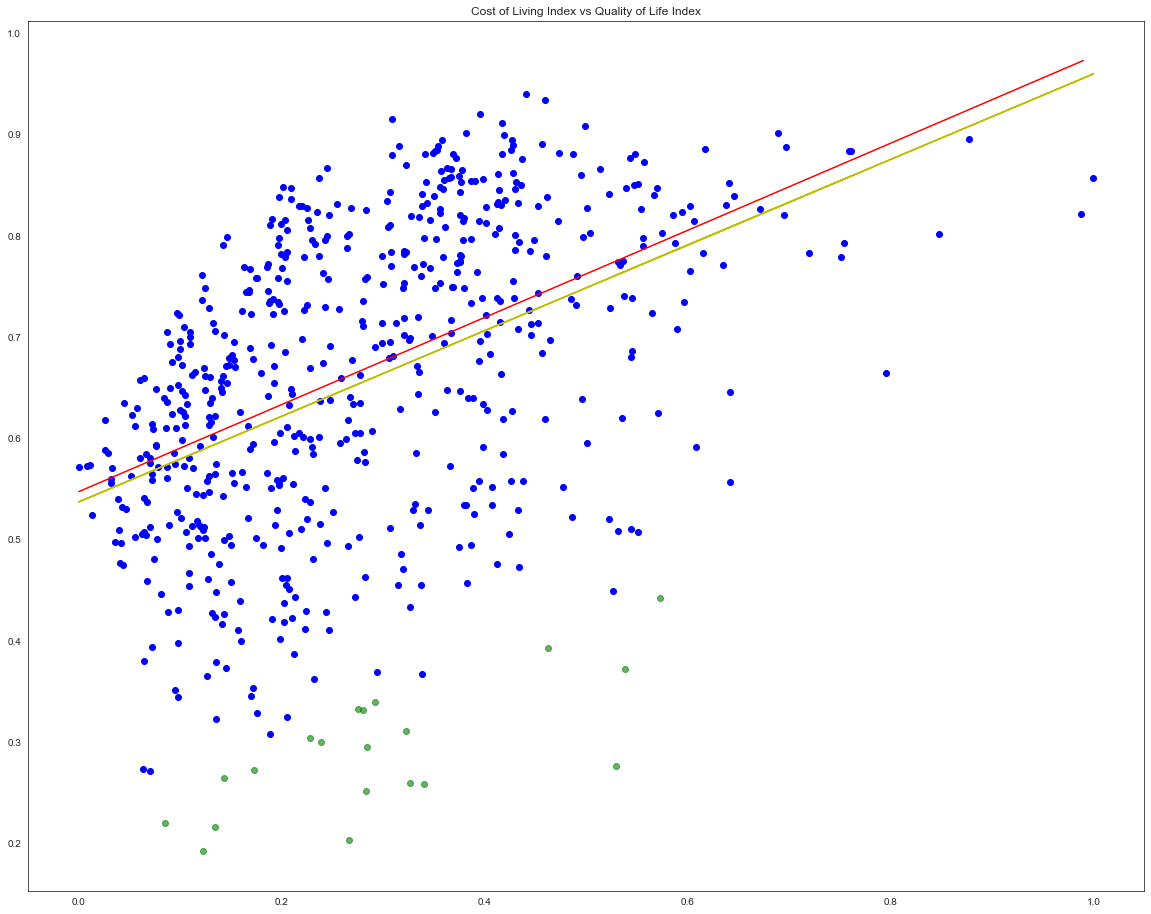

(607, 8)
Наклон: -2.063
Пересечение: 0.771


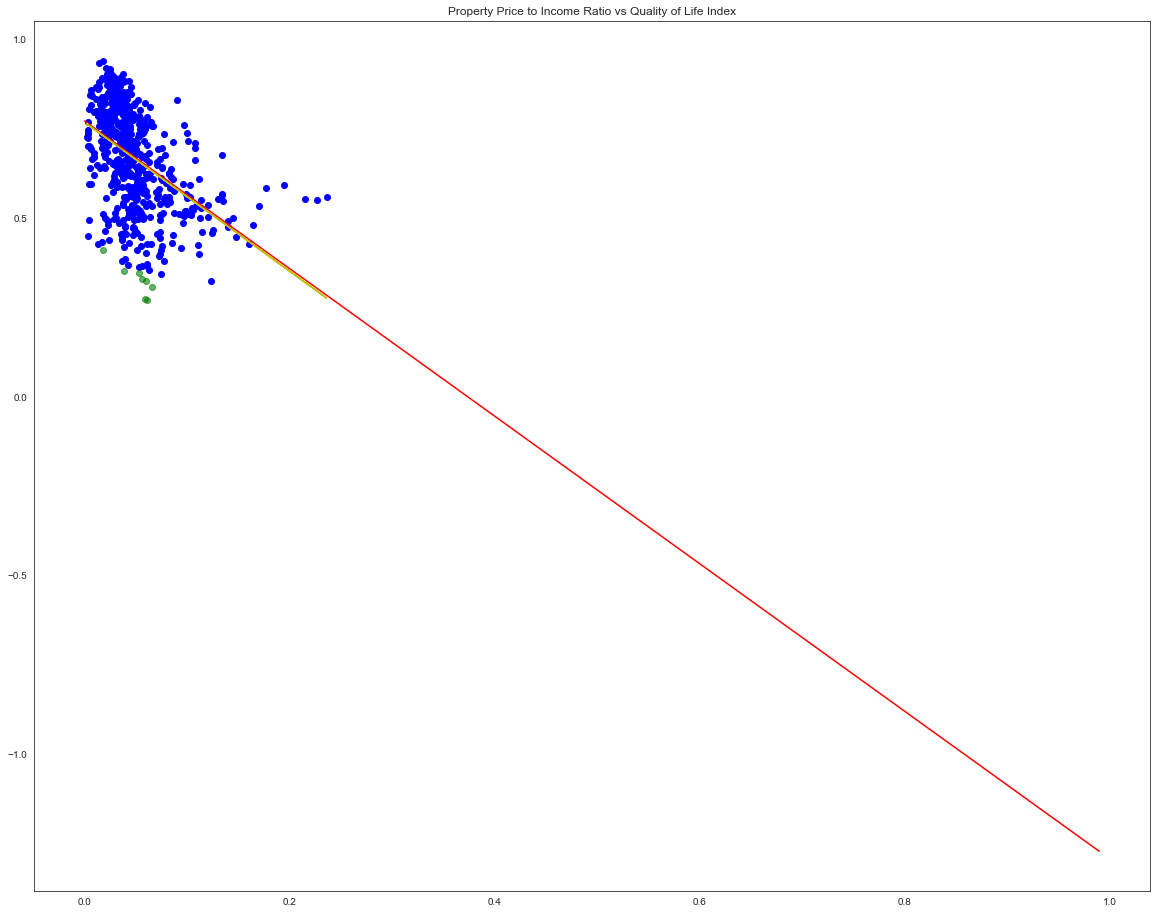

(599, 8)
Наклон: -0.504
Пересечение: 0.866


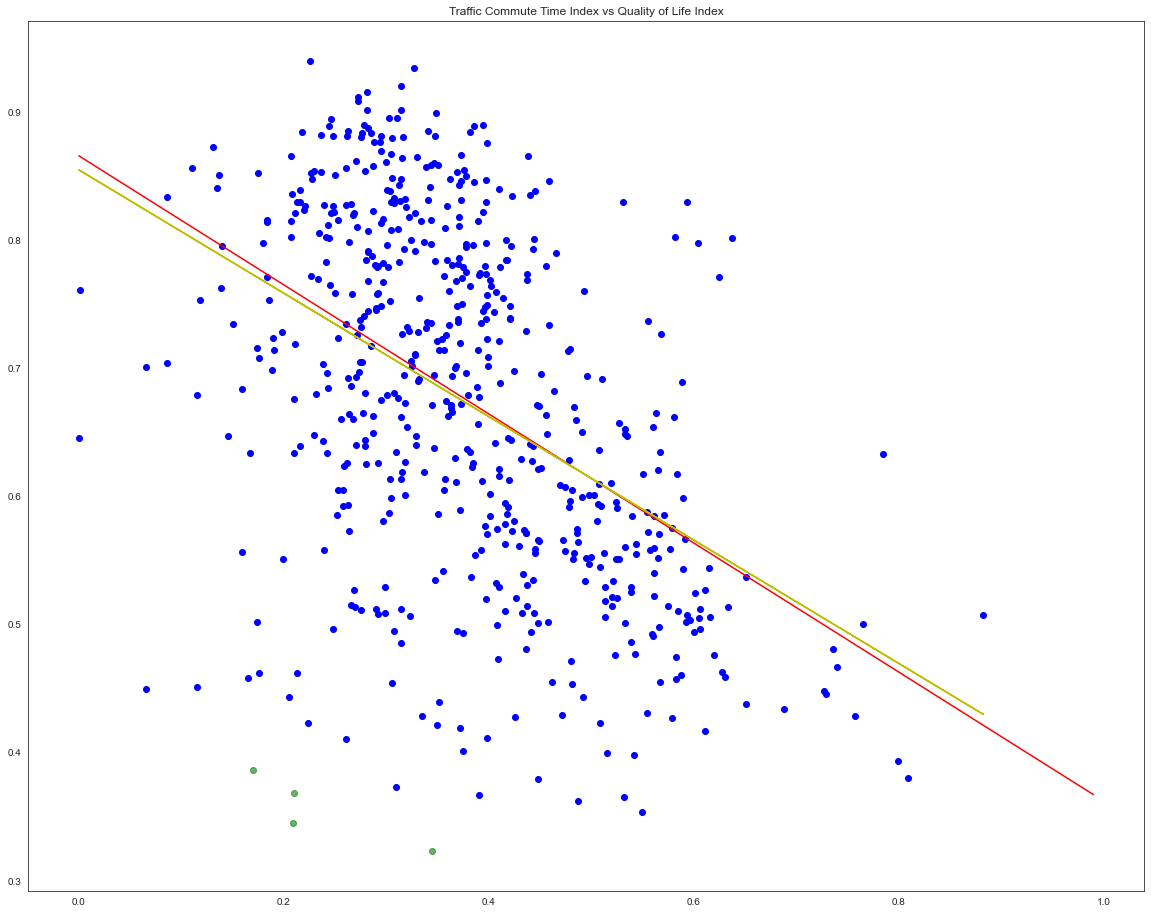

(595, 8)
Наклон: -0.594
Пересечение: 0.870


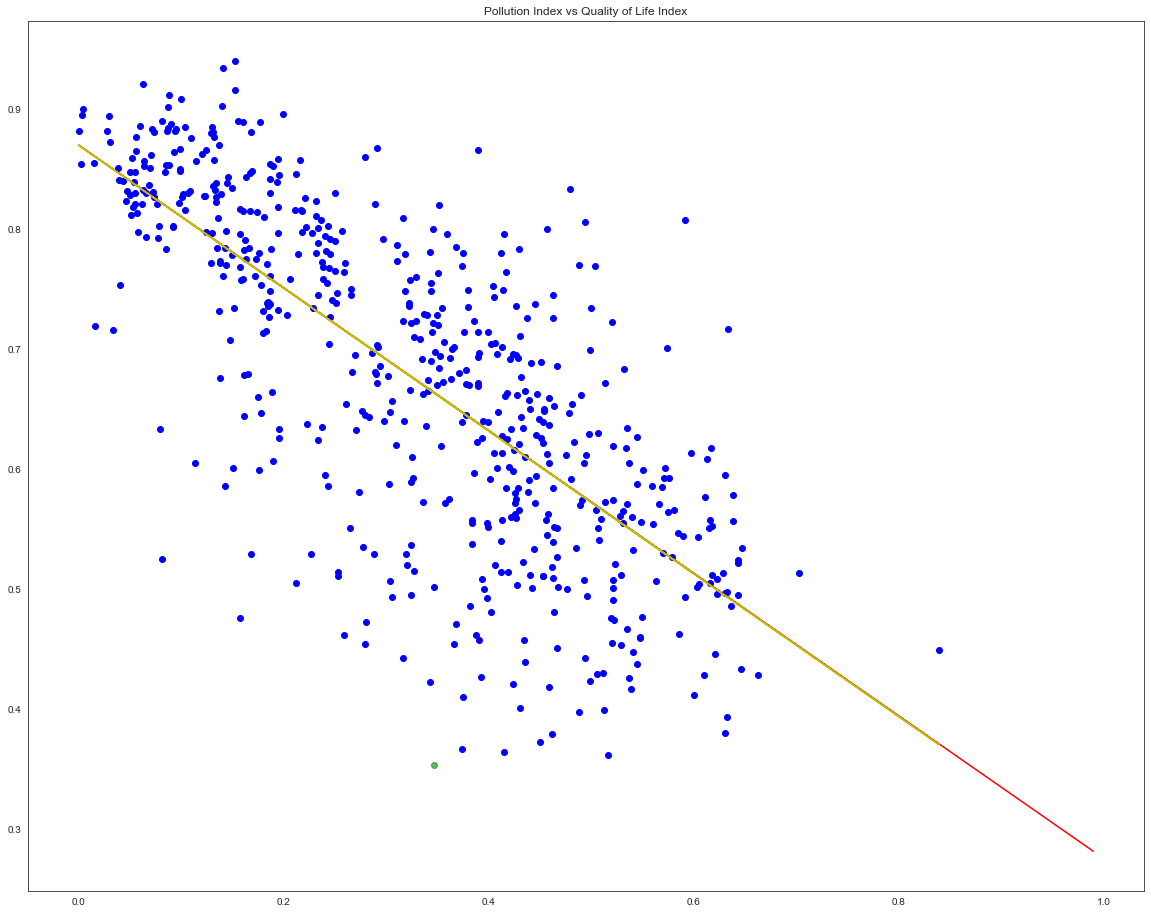

(594, 8)


In [170]:
x_bool = np.array([False for i in range(X.shape[0])])
y_bool = np.array([False for i in range(X.shape[0])])
for i in range(X.shape[1]):
    ransac_good_point = print_RANSAC(X[:,i], Y[:, 0], data.columns[i]) # С нормировкой Y
    # ransac_good_point = print_RANSAC(X[:,i], Y, data.columns[i]) # Без
    # Удаляем плохие точки из последовательности.
    X = X[ransac_good_point]
    Y = Y[ransac_good_point]

    print(X.shape)

***Пробуем обучить после удаления шумов***

*Training & Test Dataset Split*

In [171]:

X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size = 0.7, random_state = 42)

In [172]:
my_regr = LinearRegression()

my_regr.fit(X_train, y_train)

print("Training data r-squared:", my_regr.score(X_train, y_train))
print("Test data r-squared:", my_regr.score(X_test, y_test))

print("Intercept", my_regr.intercept_)
# index_data = data_on_view.drop('Quality of Life Index', axis = 1).columns

pd.DataFrame(data = my_regr.coef_[0], index = data.columns, columns=['coef'])


Training data r-squared: 0.7998910806787758
Test data r-squared: 0.8249255718728217
Intercept [0.83721162]


,coef
Rank,-0.221972
Purchasing Power Index,0.299855
Safety Index,0.065711
Health Care Index,0.058565
Cost of Living Index,-0.184053
Property Price to Income Ratio,-0.318640
Traffic Commute Time Index,-0.082998
Pollution Index,-0.265472


***Проверка важности параметров***

p-value
VIF (Мультиколлениарность)

In [173]:
X_incl_const = sm.add_constant(X_train)

model = sm.OLS(y_train, X_incl_const)
results = model.fit()

pd.DataFrame({'coef': results.params, 'p-value': np.around(results.pvalues, decimals=3)})


,coef,p-value
0,0.837212,0.000
1,-0.221972,0.000
2,0.299855,0.000
3,0.065711,0.002
4,0.058565,0.014
5,-0.184053,0.000
6,-0.318640,0.011
7,-0.082998,0.003
8,-0.265472,0.000


Traffic Commute Time Index - имеет очень большой p-values, поэтому берем его на заметку

***Мультикоринеарность (насколько параметр связан с другими параметрами)***

In [174]:
variance_inflation_factor(exog = X_incl_const, exog_idx = 1)

4.521636711673625

In [175]:
vif = [variance_inflation_factor(exog = X_incl_const,
                                 exog_idx= i) for i in range(X_incl_const.shape[1])]

pd.DataFrame({"vif": np.around(vif, 2)})

,vif
0,132.72
1,4.52
2,2.78
3,1.42
4,1.61
5,2.44
6,1.62
7,1.50
8,2.45


Все данные проходят валидацию(меньше 10), но стоит присмотреться к Rank, так как больше 5

***Пробуем обучить*** Пробуем удалить "Traffic Commute Time Index"

*Training & Test Dataset Split*

In [176]:

X_train, X_test, y_train, y_test = train_test_split(np.delete(X, [3, 5, 6], axis = 1), Y, train_size = 0.7, random_state = 42)

In [177]:
X_incl_const = sm.add_constant(X_train)

model = sm.OLS(y_train, X_incl_const)
results = model.fit()

org_coef = pd.DataFrame({'coef': results.params, 'p-value': np.around(results.pvalues, decimals = 3)})

print(X)
print("BIC is", results.bic)
org_coef

[[0.         0.61354695 0.80487805 ... 0.03112023 0.27591784 0.07098919]
 [0.15561139 0.52101032 0.73771107 ... 0.0223145  0.2752709  0.07356608]
 [0.24663822 0.4592052  0.73145716 ... 0.02576675 0.26103833 0.11413134]
 ...
 [0.73991466 0.28171504 0.74196373 ... 0.01726122 0.68817726 0.64571904]
 [0.74807919 0.39215463 0.18536585 ... 0.01285836 0.33527414 0.66251039]
 [0.75595718 0.3166087  0.58786742 ... 0.05063291 0.39786511 0.60016625]]
BIC is -1126.608460137925


,coef,p-value
0,0.860840,0.000
1,-0.272182,0.000
2,0.318414,0.000
3,0.063246,0.001
4,-0.183869,0.000
5,-0.281950,0.000


In [178]:
my_regr = LinearRegression()

my_regr.fit(X_train, y_train)

print("Training data r-squared:", my_regr.score(X_train, y_train))
print("Test data r-squared:", my_regr.score(X_test, y_test))

print("Intercept", my_regr.intercept_)


Training data r-squared: 0.7888028231596336
Test data r-squared: 0.8141658895971369
Intercept [0.86083981]


***Residuals & Residual Plots (Для интервалов)***

*Возводим в квадрат разницу ошибки(предсказанного рез-та и правильного), складываем и делим на их кол-во*

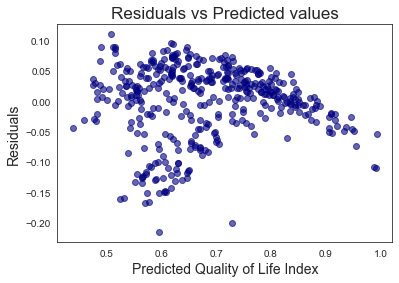

In [179]:
# Using Statsmodel
X_incl_const = sm.add_constant(X_train)
model = sm.OLS(y_train, X_incl_const)
results = model.fit()

# Residuals vs Predicted values
plt.scatter(x = results.fittedvalues, y = results.resid, c = 'navy', alpha = 0.6)

plt.xlabel('Predicted Quality of Life Index', fontsize = 14)
plt.ylabel('Residuals', fontsize = 14)
plt.title('Residuals vs Predicted values', fontsize = 17)

plt.show()

C:\Users\kuzin\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


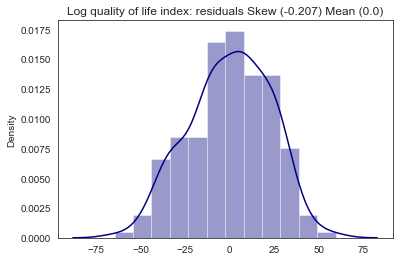

In [180]:
# Distribution of Residuals (log prices) - checking for normality
# Modified model: transromed (using log prices) & simplified (dropping two features)
q_index = data_on_view['Quality of Life Index']
features = data.drop(["Traffic Commute Time Index", 'Property Price to Income Ratio', "Health Care Index"], axis = 1)

X_train, X_test, y_train, y_test = train_test_split(features, q_index, test_size = 0.7, random_state=10)

# Using Statsmodel
X_incl_const = sm.add_constant(X_train)
model = sm.OLS(y_train, X_incl_const)
results = model.fit()

resid_mean = round(results.resid.mean(), 3)
resid_skew = round(results.resid.skew(), 3)

sns.distplot(results.resid, color = 'navy')

plt.title(f'Log quality of life index: residuals Skew ({resid_skew}) Mean ({resid_mean})')
plt.show()

***Кроссвалидация***

*Делим датасет на части и проверяем обучение относительно друг друга*

In [181]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(my_regr, X, Y, cv = 5)

# Смотрим точность и отклонение.
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))
scores

0.73 accuracy with a standard deviation of 0.12


array([0.79180041, 0.8202    , 0.81225351, 0.73505692, 0.50055459])

***Пробуем полиноминальную регрессию***

In [182]:
from sklearn.preprocessing import PolynomialFeatures

X_train, X_test, y_train, y_test = train_test_split(features, q_index, test_size = 0.7, random_state=10)

poly_regr = PolynomialFeatures(degree = 2)
X_poly = poly_regr.fit_transform(X_train)

lin_reg2 = LinearRegression()
lin_reg2.fit(X_poly, y_train)

print("Training data r-squared:", lin_reg2.score(poly_regr.fit_transform(X_train), y_train))
print("Test data r-squared:", lin_reg2.score(poly_regr.fit_transform(X_test), y_test))

print("Intercept", lin_reg2.intercept_)

Training data r-squared: 0.8858953494574423
Test data r-squared: 0.8607798490000119
Intercept 221.48190546414702


In [183]:
# Пробуем нашу модель.
print("q of l i: ", lin_reg2.predict(poly_regr.fit_transform(X_test)))
print("l reg: ", my_regr.predict(X_test))
y_test

q of l i:  [ 83.60588857  87.25299752 197.29807398 100.19518712 126.50786946
  57.25598189 105.72828677 135.36538335  82.24984835 106.1590576
  83.56786782 131.32241016 164.03060332 110.52565115  72.30131514
  89.81017642  41.95334913 168.81247074 128.7284577   26.64979666
 125.53638617 176.63059789 155.23580991  59.8947176  147.14391159
  93.78347791 125.65155306  94.15603159  55.01282558 180.93021562
  80.00183629 206.78420506 205.77786763 145.87006183 123.32019879
 134.67143807 145.02188113  98.87894397 101.26999191  37.8960891
 107.39822742 100.20088784 212.8086222  191.3305879  189.54286761
 111.10857349 102.08431453  28.34606477  94.56600291  65.0131931
 169.20749162 174.22290169  73.60073776 112.14995222  92.85493352
 142.7647637   31.71670932 142.14912908 129.75950684 158.28278753
 150.37327082  50.80800567  41.71884444 186.34496828  47.49953783
 108.97439277 123.37519903 142.48191605 184.4950248   52.37228622
 127.28628549 131.17662711  74.07415585  97.20913436  74.59739431
  

615     72.53
551     67.82
418    195.94
52     116.24
544     78.01
        ...  
21     156.33
335    132.37
362    206.49
555     42.25
633      7.67
Name: Quality of Life Index, Length: 483, dtype: float64